In [1]:
import pandas as pd

df = pd.read_csv("tips.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [2]:
# Summary statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [3]:
# For categorical variables
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [4]:
df['day'].value_counts(normalize=True)  # Percentages

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

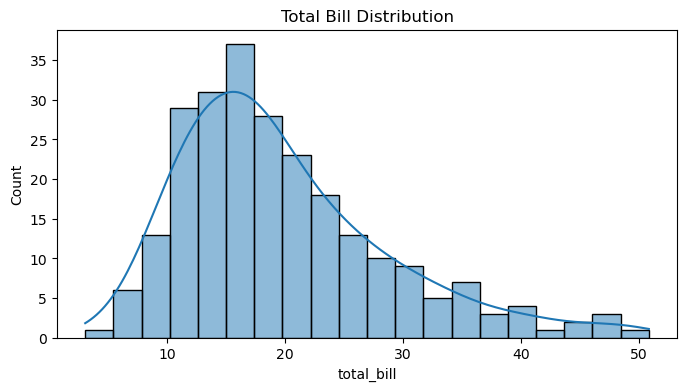

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['total_bill'], kde=True, bins=20)
plt.title('Total Bill Distribution')
plt.show()

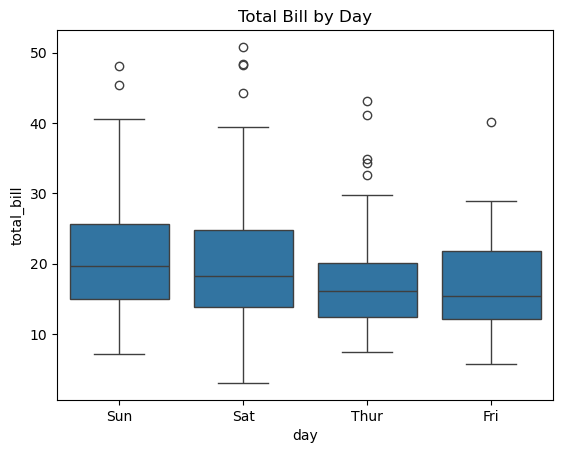

In [6]:
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Total Bill by Day')
plt.show()

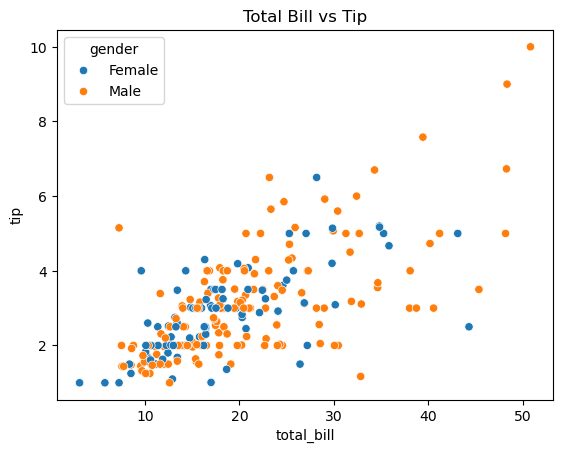

In [7]:
# Scatterplot
sns.scatterplot(x='total_bill', y='tip', hue='gender', data=df)
plt.title('Total Bill vs Tip')
plt.show()

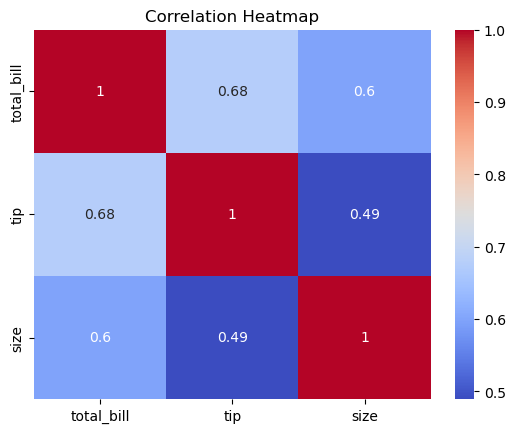

In [8]:
# Correlation matrix
corr_mat = df.select_dtypes(include="number").corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# 95% CI for mean total_bill
from scipy import stats
mean = df['total_bill'].mean()
std_err = stats.sem(df['total_bill'])
ci = stats.t.interval(0.95, len(df['total_bill'])-1, loc=mean, scale=std_err)
print(f"95% CI for Total Bill: {ci}")

95% CI for Total Bill: (18.663331704358473, 20.908553541543167)


In [10]:
male_tips = df[df['gender']=='Male']['tip']
female_tips = df[df['gender']=='Female']['tip']

t_stat, p_val = stats.ttest_ind(male_tips, female_tips)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 1.387859705421269, P-value: 0.16645623503456755


In [11]:
# Relationship between gender and smoker
contingency_table = pd.crosstab(df['gender'], df['smoker'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
print(f"Chi2: {chi2}, P-value: {p}")

Chi2: 0.001934818536627623, P-value: 0.964915107315732


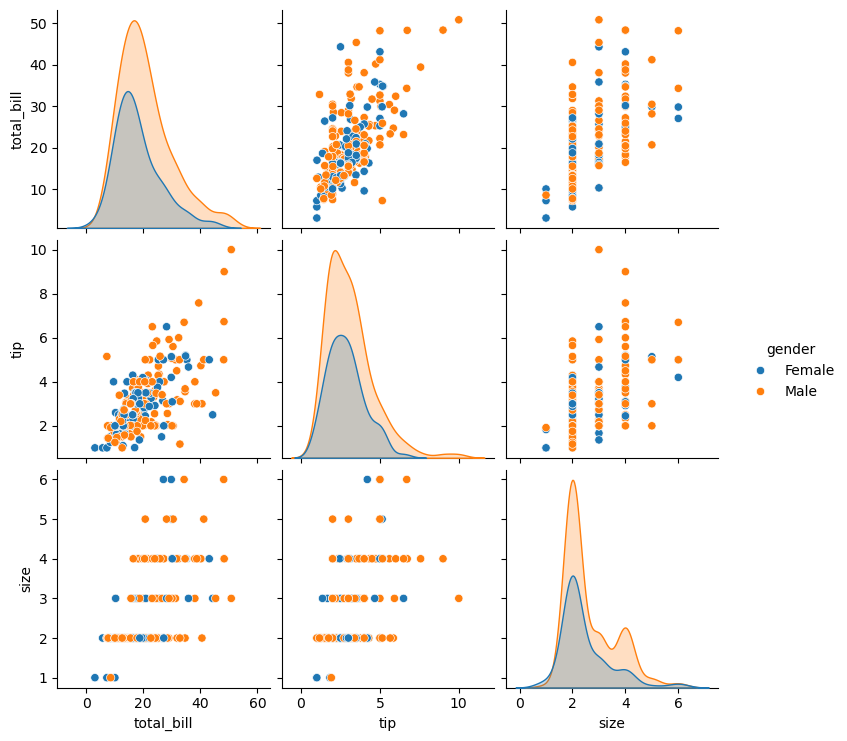

In [12]:
sns.pairplot(df, hue='gender')
plt.savefig('pairplot.svg', format="SVG")
plt.show()

In [24]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA Report")
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 39729.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df.dtypes

total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size            int64
dtype: object

In [20]:
df.memory_usage(deep=True).sum()  / 1024**2

0.05505847930908203

In [23]:
df.select_dtypes(include='number').columns.to_list()

['total_bill', 'tip', 'size']